## Wien's Displacement Constant

Planck's radiation law tells us that the intensity of spectral radiation per unit area and per unit wavelength from a black body at temperature T is:

\begin{gather*}
I(\lambda) = \frac{2\pi hc^2\lambda^{-5}}{\exp(hc/\lambda k_BT)-1}
\end{gather*}

where $h$ is Planck's constant, $c$ is the speed of light, and $k_B$ is Boltzmann's constant.

Differentiation shows that the wavelength, $\lambda$, for which the emitted radiation is strongest is the solution to:

\begin{gather*}
5e^{-hc/\lambda k_BT} + \frac{hc}{\lambda k_BT} - 5 = 0
\end{gather*}

It can further be shown that, by making the substitution $x = hc/\lambda k_BT$, the wavelength of maximum radiation obeys Wien's displacement law:

\begin{gather*} \lambda = \frac{b}{T} \end{gather*}

where Wien's displacement constant is $b = hc/k_B x$, and $x$ solves:

$5e^{-x} + x - 5 = 0$.

Below I solve for x to specified accuracy by using the binary search method, the relaxation method, and Newton's method. 

In [1]:
def binarysearch(f, x1, x2, eps):
    if f(x1)/f(x2) > 0:
        print('The initial points do not bracket the root.')
        return -1, 0
    else:
        count = 0
        while abs(x1-x2) > eps:
            mid = (x1+x2)/2
            if f(mid) == 0:
                print('There is a root at x = ', mid)
            elif f(mid)/f(x1) > 0:
                x1 = mid
            else:
                x2 = mid
            count += 1
        return (x1 + x2)/2, count

In [2]:
from numpy import exp

def relaxation(x, eps):
    diff = eps*2.
    count = 0
    while diff > eps:
        tmp = 5.*(1-exp(-x))
        diff = abs(tmp-x)
        x = tmp
        count += 1
    return x, count

In [3]:
def newton(f, df, x, eps):
    diff = eps*2.
    count = 0
    while diff > eps:
        tmp = x - f(x)/df(x)
        diff = abs(tmp-x)
        x = tmp
        count += 1
    return x, count

In [4]:
def f(x):
    return 5.*exp(-x) + x - 5.

def df(x):
    return -5.*exp(-x) + 1.

In [5]:
from scipy.constants import Planck, c, Boltzmann

# constants
eps = 1e-6    # desired accuracy
h = Planck    # Planck's constant m^2 kg / s
sl = c        # speed of light m / s
kb = Boltzmann # Boltzmann constant m^2 kg / s^2 K

To choose values that bracket the root for which I am searching I will plot the function and pick values that seem suitable.

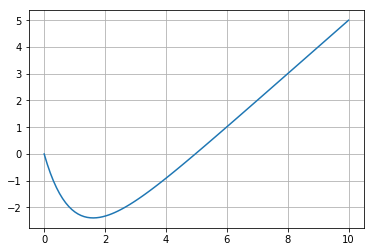

In [6]:
from numpy import linspace
from pylab import figure, plot, grid, show

x = linspace(0., 10., 100)

figure(1)
plot(x, f(x))
grid()
show()

In [7]:
x1, x2 = 3., 7.    # values that bracket the root

rootb, countb = binarysearch(f, x1, x2, eps)
print('Binary: root = {}, count = {}'.format(rootb, countb))
rootr, countr = relaxation(x2, eps)
print('Relaxation: root = {}, count = {}'.format(rootr, countr))
rootn, countn = newton(f, df, x2, eps)
print('Newton: root = {}, count = {}'.format(rootn, countn))

Binary: root = 4.965114116668701, count = 22
Relaxation: root = 4.965114233286895, count = 6
Newton: root = 4.965114231744276, count = 4


Wien's displacement law is often used to estimate the surface temperature of astronomical bodies. Below I use it to estimate the temperature of the surface of the Sun.

In [8]:
wien = h*sl/(kb*rootb)  # binary search to find Wien's constant
print("Wien's displacement constant is", wien)
print("The Sun's surface temperature in K is", wien/502e-9)

Wien's displacement constant is 0.002897772981687388
The Sun's surface temperature in K is 5772.456138819498
